<a href="https://colab.research.google.com/github/MengChiehLiu/2023-NTU-ACCT-ML-camp/blob/main/codes_for_student/Unsupervised_learning_ipynb_%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 NTU ML Camp: Unsupervised Learning
2023/2/28  
Meng-Chieh Liu

## Introduction

Unsupervised learning is a type of machine learning where we don't have any labeled data. The goal of unsupervised learning is to find patterns, structure or relationships in the data without any prior knowledge of what to look for. Unsupervised learning can be used for a variety of tasks such as clustering, dimensionality reduction, anomaly detection, and generative modeling.

## Clustering using K-Means

### Introduction

K-Means is a clustering algorithm that aims to partition n observations into k clusters. The algorithm works by iteratively assigning each observation to the nearest cluster and then recomputing the center of each cluster. The algorithm converges when the assignment of observations to clusters no longer changes.

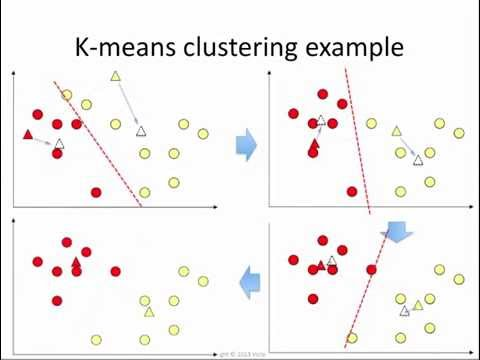

Image Source: https://www.youtube.com/watch?v=_aWzGGNrcic

### Python Practice

We will use fake data generated by sklearn make_blobs function, it will generate data with two dimensions.

In [ ]:
# Generate sample data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

Let's build the model and fit in the data. One important thing is that we need to manual decide the number of clusters, it is not easy to find the right number of clusters if you have no idea to the data, you may want to try several times to find the best number.

In [ ]:
# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Let's visualize the result.

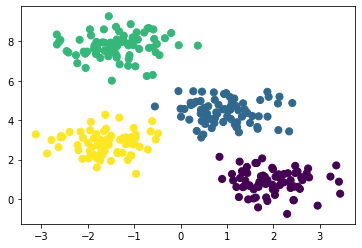

In [ ]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

## Principal Component Analysis (PCA)

### Introduction

PCA is a popular technique for dimensionality reduction. The goal of PCA is to transform the data into a lower-dimensional space while preserving as much of the original information as possible. PCA works by finding the directions of maximum variance in the data and projecting the data onto those directions.

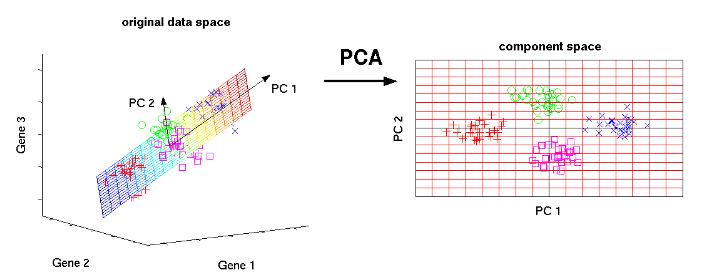

Image Source: https://mark1002.github.io/2018/01/14/PCA學習與應用/

### Python Practice

We will use wine dataset from sklearn to illustrate PCA.

In [ ]:
# Load Wine dataset
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

As you can see below, there are 13 features in X.

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Before we doing PCA, we usually do Standardizing on data.

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

Let's build the PCA model and fit in the data, to be noticed that the n_components parameters will decide how may component we are going to use for the model, if the parameters is integer, then it means the number of component, if the parameters is float between 0~1, then it represents the cumulated explained variance ratio we want to reach.

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA

n_components = 0.99
random_state=666
pca = PCA(n_components=n_components, random_state=random_state)
X_pca = pca.fit_transform(X)

We can have a look on the Explained Variance Ratio for each component.

In [ ]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233])

We can calculate cumulated value using numpy cumsum function and draw it using matplotlib.

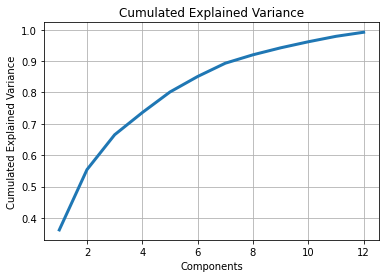

In [ ]:
# Draw Cumulated Explained Variance Ratio
import matplotlib.pyplot as plt

plt.plot(range(1,len(explained_variance_ratio)+1),
    np.cumsum(explained_variance_ratio),linewidth=3)
plt.title("Cumulated Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulated Explained Variance")
plt.grid()

As you can see, we only need 7 component to reach 90% of Cumulated Explained Variance.

Let’s try to visualize the top three component in a 3D space.

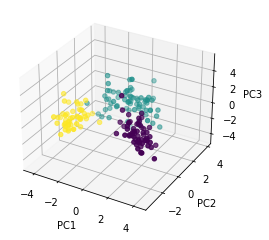

In [ ]:
# Visualize the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

We can decompose the components back to proportion of features.

In [ ]:
# Decompose the Component
df_pc = pd.DataFrame(np.array(pca.components_))
df_pc.index = [f"Component_{c}" for c in range(1,len(df_pc)+1)]
df_pc.head().style.background_gradient(cmap='coolwarm', axis=None).format("{:.2}")

,0,1,2,3,4,5,6,7,8,9,10,11,12
Component_1,0.14,-0.25,-0.0021,-0.24,0.14,0.39,0.42,-0.3,0.31,-0.089,0.3,0.38,0.29
Component_2,-0.48,-0.22,-0.32,0.011,-0.3,-0.065,0.0034,-0.029,-0.039,-0.53,0.28,0.16,-0.36
Component_3,-0.21,0.089,0.63,0.61,0.13,0.15,0.15,0.17,0.15,-0.14,0.085,0.17,-0.13
Component_4,-0.018,0.54,-0.21,0.061,-0.35,0.2,0.15,-0.2,0.4,0.066,-0.43,0.18,-0.23
Component_5,-0.27,0.035,-0.14,0.066,0.73,-0.15,-0.11,-0.5,0.14,-0.076,-0.17,-0.1,-0.16


Take component_1 for example, it was constructed with 14% of feature_0, -25% of feature_1, -0.21% of feature_2... and so on.

## Task: PCA and K-means on breast_cancer dataset

After previous tutorial, you should have gotten familiar with K-means and PCA, so here is a task for you. Please aplly PCA on X of breast_cancer form sklearn, setting component to 2. After that, you need to apply K-means on the components. Finally, you should use matplotlib to visualize the result.

These are the package you need.

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target